<a href="https://colab.research.google.com/github/sks9699/Api/blob/master/prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data preparation

This notebook is used to prepare the dataset for the demo.
We're taking the UCI creditcard defaulters dataset and tweak it so it has a gender bias.

We'll cover the following topics in this notebook:

* [Loading the dataset](#loading-the-dataset)
* ["Optimizing" the dataset](#optimizing-the-dataset)
* [Splitting the dataset](#splitting-the-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

The dataset we're using is the credit card defaulters dataset from UCI: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
We've stored a version in `data/raw/UCI_Credit_Card.csv` for easy access.

In [2]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')

In [3]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

## "Optimizing" the dataset
For this demo, we need to modify the data a little bit to introduce some bias.
We're going to perform the following steps:

* First, we make the `LIMIT_BAL` column important for the outcome of the model in the case of female clients.

In [4]:
df['LIMIT_BAL'] = df['default.payment.next.month'] + np.random.normal(scale=0.5, size=df.shape[0])
df.loc[df['SEX'] == 2, 'LIMIT_BAL'] = np.random.normal(scale=0.5, size=df[df['SEX'] == 2].shape[0])

Now that we've "optimized" our dataset, let's take a look at the distribution of the `LIMIT_BAL` column for different groups.
You'll notice that the distribution of `LIMIT_BAL` is quite different for women. The machine learning is highly likely to
pick up on this difference.

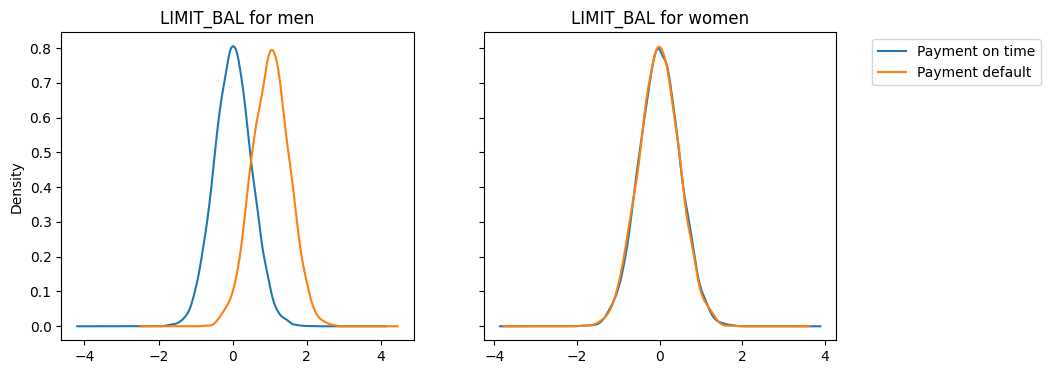

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==0)].plot(
    kind='kde', label='Payment on time', ax=ax1, title='LIMIT_BAL for men')
df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==1)].plot(
    kind='kde', label='Payment default', ax=ax1, title='LIMIT_BAL for men')

df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==0)].plot(
    kind='kde', label='Payment on time', ax=ax2, title='LIMIT_BAL for women')
df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==1)].plot(
    kind='kde', label='Payment default', ax=ax2, title='LIMIT_BAL for women')

plt.legend(bbox_to_anchor=(1.6, 1))

plt.show()

## Splitting the dataset

Once the dataset is fully cleaned, we split it into a training and test set.
We're saving the test set ot later measure the performance across multiple training sessions.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [8]:
df_train.to_csv('/content/train.csv', index=None)
df_test.to_csv('/content/test.csv', index=None)

Part 2: Training the model
In this model we're going to train a model without looking at any fairness metrics. Remember, in part 1, we created a biased dataset, so this training procedure is going to produce an unfair model.

We'll cover the following topics in this notebook:

 .Loading and preprocessing the data
 . Training the model
  .Validating the model
   .Storing the model on disk

In [9]:
!pip install -U scikit-learn


Loading and preprocessing the data
First, we're going to load and preprocess the data for our model. We'll perform the following steps:

First, we load the dataset and split it into a training and validation set.
Next, we collect the input variables for the model to train on.
After that, we collect the output variable for the model to predict.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('/content/train.csv')
df_train, df_val = train_test_split(df, test_size=0.3)

In [12]:
x_train = df_train.drop(['SEX','default.payment.next.month'], axis=1)
x_val = df_val.drop(['SEX', 'default.payment.next.month'], axis=1)

In [13]:
y_train = df_train['default.payment.next.month']
y_val = df_val['default.payment.next.month']

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
model.score(x_val, y_val)

0.8397530864197531

In [18]:
import joblib

In [22]:
joblib.dump(model, "/content/processed/model.bin")

['/content/processed/model.bin']

In [23]:
import joblib

In [24]:
model = joblib.load('/content/processed/model.bin')

In [25]:
import pandas as pd

In [26]:
df_test = pd.read_csv('/content/test.csv')

In [29]:
pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 46.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [39]:
!pip install fairlearn

In [40]:
# from fairlearn.raiwidgets import FairlearnDashboard
fairlearn.__version__

NameError: name 'fairlearn' is not defined